In [101]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, model_from_json
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils, to_categorical
from keras.datasets import cifar10
from keras import backend as K

import random

In [16]:
%matplotlib inline
np.random.seed(411)

In [69]:
# Load pre-shuffled CIFAR10 data into train and test sets
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [70]:
train_images.shape, train_labels.shape

((50000, 32, 32, 3), (50000, 1))

In [71]:
test_images.shape, test_labels.shape

((10000, 32, 32, 3), (10000, 1))

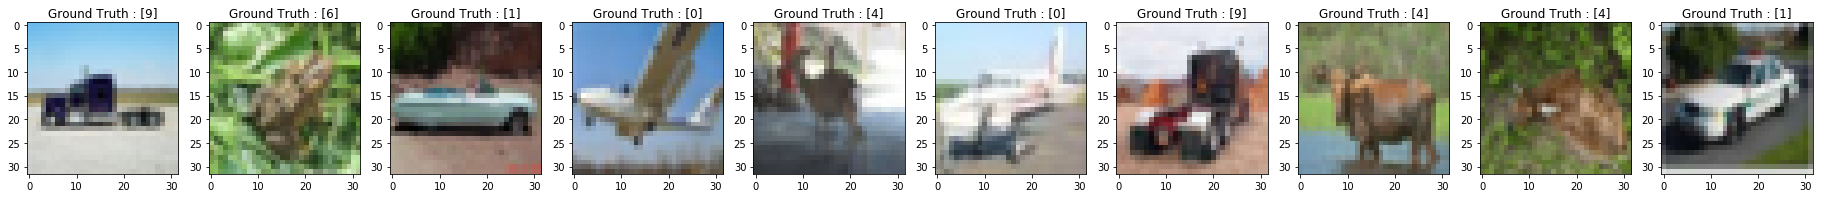

In [72]:
plt.figure(figsize=(32,32)) 
amount = 10

for i in range(amount):
    rand_id = random.randint(1, train_images.shape[0])
    plt.subplot(1,amount,(i+1))
    plt.title("Ground Truth : {}".format(train_labels[rand_id]))
    plt.imshow(train_images[rand_id])

plt.show()

## Build Model

In [82]:
classes = np.unique(train_labels)
num_classes = len(classes)

# input image dimensions
img_rows, img_cols = train_images.shape[1], train_images.shape[2]

In [74]:
if K.image_data_format() == 'channels_first':
    train_images = train_images.reshape(train_images.shape[0], train_images.shape[3], img_rows, img_cols)
    test_images = test_images.reshape(test_images.shape[0], train_images.shape[3], img_rows, img_cols)
    input_shape = (train_images.shape[3], img_rows, img_cols)
else:
    # train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
    # test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, train_images.shape[3])

In [83]:
# change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
 
# display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[6])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[6])

Original label 0 :  [2]
After conversion to categorical ( one-hot ) :  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [84]:
def createModel(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model

In [85]:
model_cifar = createModel(input_shape, num_classes)

In [86]:
model_cifar.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 64)          0         
__________

In [87]:
batch_size = 256
epochs = 100

In [88]:
model_cifar.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy']) 

In [90]:
history = model_cifar.fit(train_images, train_labels_one_hot, batch_size=batch_size, epochs=epochs, shuffle=True, verbose=1, 
                   validation_data=(test_images, test_labels_one_hot)) 

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 726s 15ms/step - loss: 2.4248 - acc: 0.1927 - val_loss: 1.8368 - val_acc: 0.3249
Epoch 2/100
50000/50000 [==============================] - 721s 14ms/step - loss: 1.8352 - acc: 0.3348 - val_loss: 1.5473 - val_acc: 0.4405
Epoch 3/100
50000/50000 [==============================] - 703s 14ms/step - loss: 1.6299 - acc: 0.4159 - val_loss: 1.5492 - val_acc: 0.4425
Epoch 4/100
50000/50000 [==============================] - 514s 10ms/step - loss: 1.5053 - acc: 0.4619 - val_loss: 1.3608 - val_acc: 0.5129
Epoch 5/100
50000/50000 [==============================] - 406s 8ms/step - loss: 1.3995 - acc: 0.5030 - val_loss: 1.3848 - val_acc: 0.5305
Epoch 6/100
50000/50000 [==============================] - 401s 8ms/step - loss: 1.3182 - acc: 0.5362 - val_loss: 1.5287 - val_acc: 0.4934
Epoch 7/100
50000/50000 [==============================] - 418s 8ms/step - loss: 1.2455 - acc: 0.5612 - val_loss

50000/50000 [==============================] - 325s 7ms/step - loss: 0.8699 - acc: 0.7188 - val_loss: 0.8485 - val_acc: 0.7174
Epoch 60/100
50000/50000 [==============================] - 327s 7ms/step - loss: 0.8601 - acc: 0.7236 - val_loss: 0.8075 - val_acc: 0.7394
Epoch 61/100
50000/50000 [==============================] - 327s 7ms/step - loss: 0.8717 - acc: 0.7188 - val_loss: 0.7965 - val_acc: 0.7368
Epoch 62/100
50000/50000 [==============================] - 327s 7ms/step - loss: 0.8588 - acc: 0.7235 - val_loss: 0.8736 - val_acc: 0.7077
Epoch 63/100
50000/50000 [==============================] - 326s 7ms/step - loss: 0.8652 - acc: 0.7204 - val_loss: 0.9175 - val_acc: 0.6812
Epoch 64/100
50000/50000 [==============================] - 327s 7ms/step - loss: 0.8643 - acc: 0.7237 - val_loss: 0.8470 - val_acc: 0.7186
Epoch 65/100
50000/50000 [==============================] - 326s 7ms/step - loss: 0.8692 - acc: 0.7188 - val_loss: 0.9407 - val_acc: 0.6874
Epoch 66/100
50000/50000 [=======

In [93]:
score = model_cifar.evaluate(test_images, test_labels_one_hot)
print('Test loss:', score[0]*100)
print('Test accuracy:', score[1]*100)

10000/10000 [==============================] - 27s 3ms/step
Test loss: 0.8983389792442322
Test accuracy: 0.7094


Text(0.5,1,'Loss Curves')

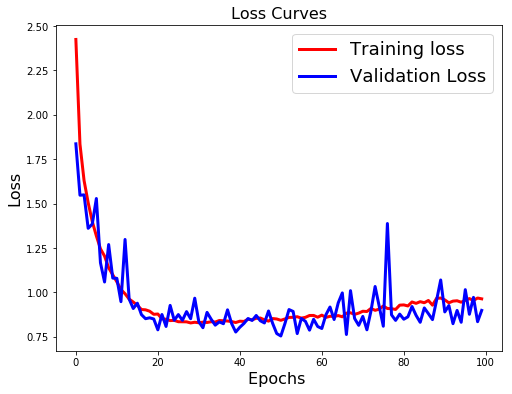

In [95]:
# plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5,1,'Accuracy Curves')

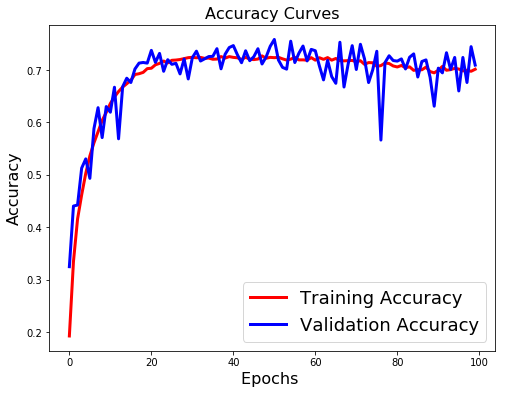

In [96]:
# plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

## Save Model

In [98]:
# serialize model to JSON
model_cifar_json = model_cifar.to_json()
with open("weights/model_cifar.json", "w") as json_file:
    json_file.write(model_cifar_json)
    
# serialize weights to HDF5
model_cifar.save_weights("weights/model_cifar.h5")
print("Model saved to disk...")

Model saved to disk...


## Load Model

In [102]:
# load json and create model
json_file = open('weights/model_cifar.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model_cifar = model_from_json(loaded_model_json)

# load weights into new model
loaded_model_cifar.load_weights("weights/model_cifar.h5")
print("Loaded model from disk...")

Loaded model from disk...


In [111]:
# evaluate loaded model on test data
loaded_model_cifar.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [112]:
score = model_cifar.evaluate(test_images, test_labels_one_hot)
print('Test loss:', score[0]*100)
print('Test accuracy:', score[1]*100)

10000/10000 [==============================] - 26s 3ms/step
Test loss: 89.83389792442323
Test accuracy: 70.94


<hr/>